In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Jute_Pest_Dataset_path = '/content/drive/MyDrive/Jute_Pest_Dataset'

Files in Yellow Mite:
['yellow_mite_0_1125.jpg', 'yellow_mite_0_1092.jpg', 'yellow_mite_0_100.jpg', 'yellow_mite_0_1339.jpg', 'yellow_mite_0_1299.jpg', 'yellow_mite_0_1206.jpg', 'yellow_mite_0_1444.jpg', 'yellow_mite_0_1317.jpg', 'yellow_mite_0_1284.jpg', 'yellow_mite_0_1137.jpg', 'yellow_mite_0_1492.jpg', 'yellow_mite_0_1228.jpg', 'yellow_mite_0_1698.jpg', 'yellow_mite_0_156.jpg', 'yellow_mite_0_1724.jpg', 'yellow_mite_0_133.jpg', 'yellow_mite_0_1225.jpg', 'yellow_mite_0_1617.jpg', 'yellow_mite_0_1715.jpg', 'yellow_mite_0_1633.jpg', 'yellow_mite_0_1260.jpg', 'yellow_mite_0_1501.jpg', 'yellow_mite_0_1240.jpg', 'yellow_mite_0_165.jpg', 'yellow_mite_0_1344.jpg', 'yellow_mite_0_117.jpg', 'yellow_mite_0_1689.jpg', 'yellow_mite_0_1493.jpg', 'yellow_mite_0_1557.jpg', 'yellow_mite_0_1226.jpg', 'yellow_mite_0_1496.jpg', 'yellow_mite_0_1234.jpg', 'yellow_mite_0_2481.jpg', 'yellow_mite_0_2273.jpg', 'yellow_mite_0_2104.jpg', 'yellow_mite_0_1973.jpg', 'yellow_mite_0_2270.jpg', 'yellow_mite_0_1896.

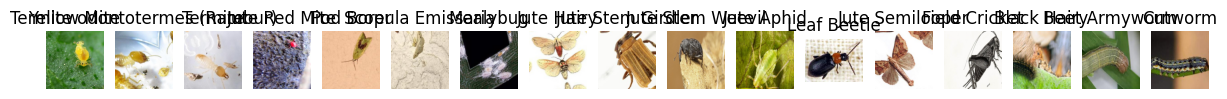

In [3]:
#The below code is used to import the liabraries.
import matplotlib.pyplot as  plt # For plotting images and customizing figures
import matplotlib.image as mpimg  # For loading and displaying images
import random # For selecting random images from a folder

# Set the figure size for the entire plot
plt.figure(figsize=(15, 10)) # The size of the figure in inches (width x height)

# Define the path to the 'train' folder
train_folder_path = os.path.join(Jute_Pest_Dataset_path, 'train')

# Get the list of subfolders in the 'train' folder
subfolders = os.listdir(train_folder_path)

# Print the list of files in each subfolder within the 'train' folder
for folder in subfolders:
    # Create the full path to the subfolder
    folder_path = os.path.join(train_folder_path, folder)
    print(f"Files in {folder}:")
    # List files in the subfolder
    print(os.listdir(folder_path))
    print("\n")

for i, folder in enumerate(subfolders):
    folder_path = os.path.join(train_folder_path, folder)
    image_file = random.choice(os.listdir(folder_path)) # Picks a random file from the current subfolder using os.listdir, which lists all files in the directory.
    image_path = os.path.join(folder_path, image_file)# Constructs the full path to the selected image.

    # Load and display the image
    img = mpimg.imread(image_path)#Reads the image as an array for visualization.
    #The below code overall used to display image which has randomly chosen for image.
    plt.subplot(1, len(subfolders), i + 1)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')

plt.show()

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [5]:
train_path = '/content/drive/MyDrive/Jute_Pest_Dataset/train'
test_path = '/content/drive/MyDrive/Jute_Pest_Dataset/test'
val_path = '/content/drive/MyDrive/Jute_Pest_Dataset/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,  # Random rotation
    width_shift_range=0.15,  # Random horizontal shifting
    height_shift_range=0.15,  # Random vertical shifting
    shear_range=0.20,  # Shear transformation
    zoom_range=0.20,  # Random zooming
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing and validation data

# Create generators to read images from directory batch by batch
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)


Found 6443 images belonging to 17 classes.
Found 413 images belonging to 17 classes.
Found 379 images belonging to 17 classes.


In [6]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(17, activation='softmax')
])


# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1107 - loss: 2.8242

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 898s 8s/step - accuracy: 0.1109 - loss: 2.8228 - val_accuracy: 0.2228 - val_loss: 2.5153
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.2227 - loss: 2.3145 - val_accuracy: 0.3850 - val_loss: 2.2112
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.2342 - loss: 2.1194 - val_accuracy: 0.3801 - val_loss: 2.1794
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.3331 - loss: 2.0431 - val_accuracy: 0.4867 - val_loss: 1.8499
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.4086 - loss: 1.8341 - val_accuracy: 0.4625 - val_loss: 1.8318
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.4217 - loss: 1.6350 - val_accuracy: 0.4600 - val_loss: 1.8405
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.4804 - loss: 1.6074 - val_accuracy: 0.4673 - val_loss: 1.8464
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.5054 - loss: 1.5069 - val_accuracy: 0

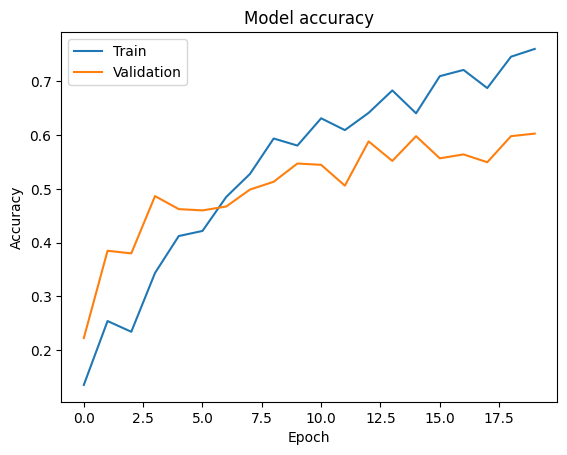

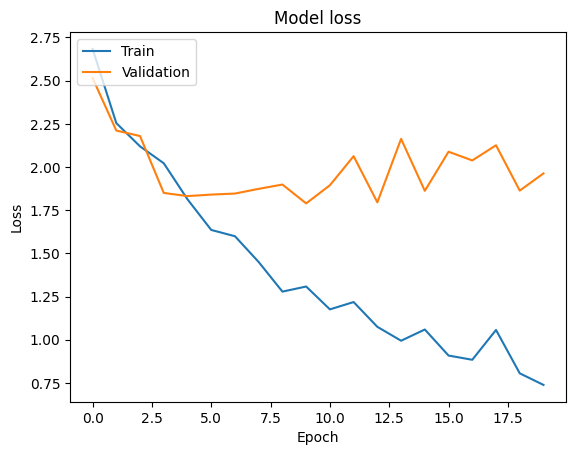

In [7]:



history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Use calculated value
    epochs=20,
    validation_data=val_generator,
    validation_steps=50  # Use calculated value
)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [8]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)
model.summary()

50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7376 - loss: 0.9076 
Test accuracy: 0.7414247989654541


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │           8,721 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,127,157 (217.92 MB)

 Trainable params: 19,042,385 (72.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,084,772 (145.28 MB)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict the labels for test set
test_generator.reset()  # Resetting the generator to ensure proper batch sizes
predictions = model.predict(test_generator, steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_generator.classes

# Test accuracy
test_accuracy = np.mean(predicted_classes == true_classes)

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Classification report for Precision, Recall, F1-score
clf_report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys(), digits=4)

print("Test Accuracy: {:.4f}".format(test_accuracy))
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(clf_report)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 510ms/step
Test Accuracy: 0.0660
Confusion Matrix:
[[1 1 0 4 3 2 1 0 0 1 2 2 0 1 0 1 1]
 [1 0 0 0 4 2 1 1 2 0 2 2 2 1 2 0 0]
 [1 0 1 2 1 3 1 2 1 2 2 0 1 2 0 1 0]
 [0 4 0 2 1 0 1 0 0 1 2 1 3 0 1 1 3]
 [1 1 0 5 1 0 1 1 1 3 0 1 3 0 1 3 0]
 [1 2 1 3 1 2 0 2 0 2 1 0 0 2 1 1 1]
 [1 2 3 1 2 1 0 0 1 3 0 1 2 0 1 5 1]
 [2 0 1 2 1 0 2 3 0 0 0 1 3 2 2 1 1]
 [1 0 2 3 2 3 2 2 0 0 3 1 2 0 0 1 2]
 [1 3 0 3 3 1 0 0 0 2 2 0 3 1 2 2 1]
 [2 2 0 4 1 1 2 0 2 2 1 3 0 0 0 3 1]
 [1 1 0 5 1 1 1 1 5 0 1 1 2 0 0 1 3]
 [0 0 0 4 3 0 2 2 1 0 1 1 3 3 0 2 2]
 [1 2 1 1 1 4 1 3 2 1 1 0 2 0 1 2 1]
 [0 0 0 2 1 2 1 1 2 2 1 2 0 0 1 1 4]
 [0 1 0 0 4 4 2 0 1 1 2 0 1 0 2 4 2]
 [0 0 0 4 2 1 1 1 2 3 1 0 2 0 2 2 3]]
Classification Report:
                               precision    recall  f1-score   support

                Beet Armyworm     0.0714    0.0500    0.0588        20
                  Black Hairy     0.0000    0.0000    0.0000        20
                      Cutworm     0.1111    0.0500  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.0815 - loss: 50257.4570 - val_accuracy: 0.1719 - val_loss: 2.8342
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.1013 - loss: 2.8081 - val_accuracy: 0.0654 - val_loss: 2.8188
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.1720 - loss: 2.7271 - val_accuracy: 0.0654 - val_loss: 2.8208
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.0903 - loss: 2.8123 - val_accuracy: 0.1719 - val_loss: 2.7849
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.0982 - loss: 2.8144 - val_accuracy: 0.1719 - val_loss: 2.7860
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.1247 - loss: 2.7914 - val_accuracy: 0.1719 - val_loss: 2.7956
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.0914 - loss: 2.8136 - val_accuracy: 0.1719 - val_loss: 2.7727
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.1012 - loss: 2.8142 - val_accuracy: 0.1719 - val_loss: 2.8221
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.0783 - loss: 2.8478 - val_accuracy:

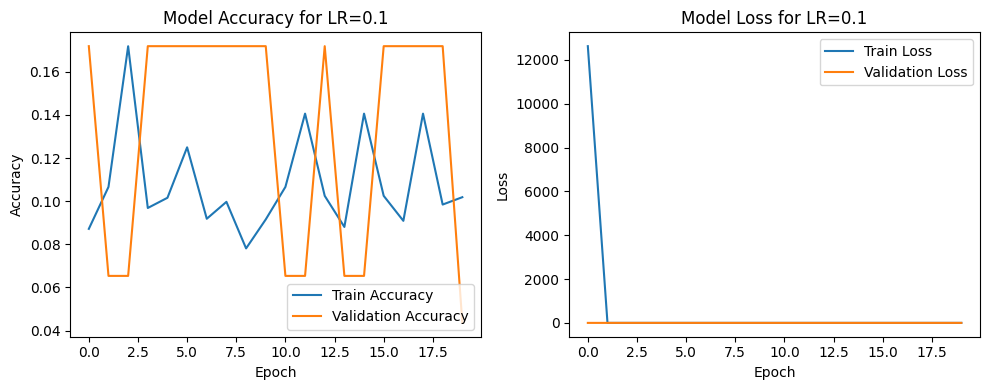

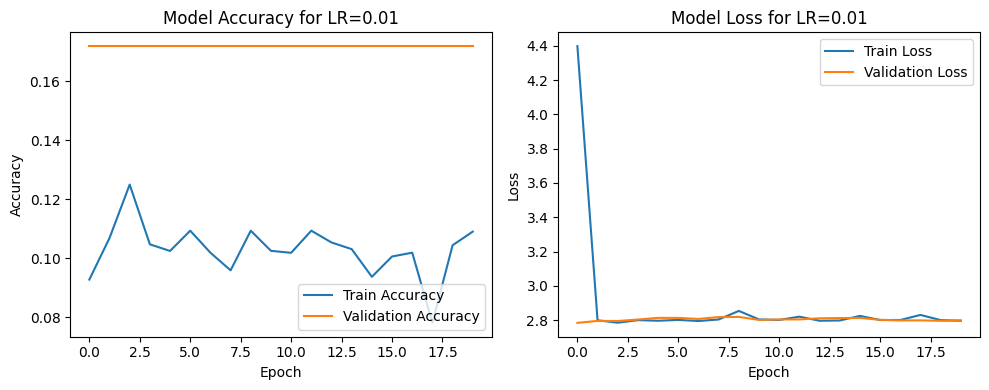

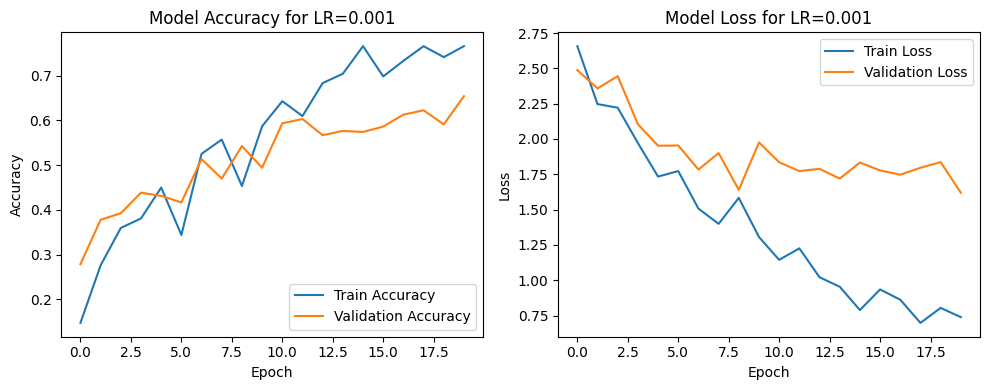

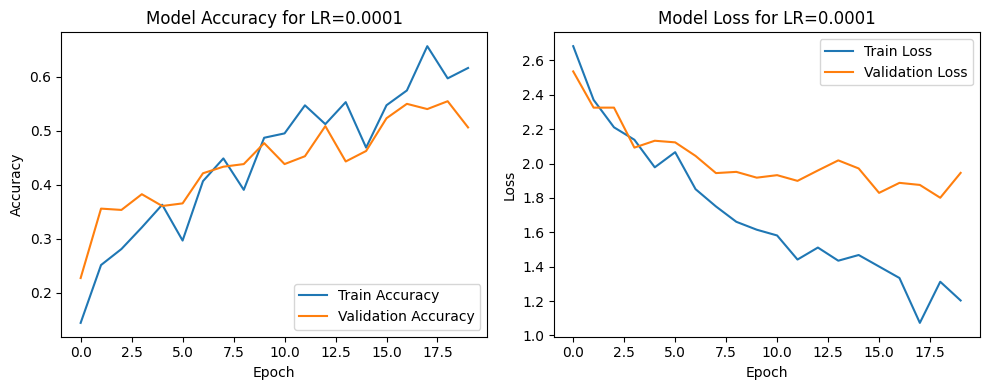

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Function to create a new model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(17, activation='softmax')
    ])
    return model

# List of learning rates to evaluate
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Dictionaries to store the results
all_histories = []

# Evaluate each learning rate
for lr in learning_rates:
    model = create_model()  # Create a fresh model
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch=100,  # Adjust accordingly
        epochs=20,
        validation_data=val_generator,
        validation_steps=50  # Adjust accordingly
    )

    all_histories.append(history.history)

# Plot accuracy and loss for each learning rate
for i, lr in enumerate(learning_rates):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(all_histories[i]['accuracy'], label='Train Accuracy')
    plt.plot(all_histories[i]['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy for LR={lr}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(all_histories[i]['loss'], label='Train Loss')
    plt.plot(all_histories[i]['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for LR={lr}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
